In [ ]:
# Create a kaggle folder
!mkdir ~/.kaggle
# Copy json file into the kaggle folder
!cp /content/drive/MyDrive/YouTube/kaggle.json ~/.kaggle/
# Give full read & write permission only to the owner
!chmod 600 ~/.kaggle/kaggle.json
# Download the blastchar/telco-customer-churn dataset
!kaggle datasets download blastchar/telco-customer-churn
# Unzip the downloaded dataset
!unzip /content/telco-customer-churn.zip
# Delete the zip file
!rm -rf /content/telco-customer-churn.zip

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 53.4MB/s]
Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


- customerID: A unique ID that identifies each customer.,
- gender: The customer’s gender - Male, Female,
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0),
- Partner: Whether the customer has a partner or not (Yes, No),
- Dependents: Whether the customer has dependents or not (Yes, No),
- tenure: Number of months the customer has stayed with the company,
- PhoneService: Whether the customer has a phone service or not (Yes, No),
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service),
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No),
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service),
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service),
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service),
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service),
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service),
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service),
- Contract: The contract term of the customer (Month-to-month, One year, Two year),
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No),
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)),
- MonthlyCharges: The amount charged to the customer monthly,
- TotalCharges: The total amount charged to the customer,
- Churn: Whether the customer churned or not (Yes or No).

In [ ]:
# Import the modules
import pandas as pd

# Load the data
df = pd.read_csv(filepath_or_buffer="/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Iterate through the columns
for col in df.columns:
    # If the number of unique values is equal or below 5
    if df.loc[:, col].nunique() <= 5:
        # Add the unique features to the print
        print(f"{col}: {df.loc[:, col].nunique()}, {df.loc[:, col].unique()} -> {df.loc[:, col].dtype}")
    else:
        # Otherwise only include [col name, # unique vals, dtype]
        print(f"{col}: {df.loc[:, col].nunique()} -> {df.loc[:, col].dtype}")

customerID: 7043 -> object
gender: 2, ['Female' 'Male'] -> object
SeniorCitizen: 2, [0 1] -> int64
Partner: 2, ['Yes' 'No'] -> object
Dependents: 2, ['No' 'Yes'] -> object
tenure: 73 -> int64
PhoneService: 2, ['No' 'Yes'] -> object
MultipleLines: 3, ['No phone service' 'No' 'Yes'] -> object
InternetService: 3, ['DSL' 'Fiber optic' 'No'] -> object
OnlineSecurity: 3, ['No' 'Yes' 'No internet service'] -> object
OnlineBackup: 3, ['Yes' 'No' 'No internet service'] -> object
DeviceProtection: 3, ['No' 'Yes' 'No internet service'] -> object
TechSupport: 3, ['No' 'Yes' 'No internet service'] -> object
StreamingTV: 3, ['No' 'Yes' 'No internet service'] -> object
StreamingMovies: 3, ['No' 'Yes' 'No internet service'] -> object
Contract: 3, ['Month-to-month' 'One year' 'Two year'] -> object
PaperlessBilling: 2, ['Yes' 'No'] -> object
PaymentMethod: 4, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] -> object
MonthlyCharges: 1585 -> float64
TotalCharges:

In [ ]:
# Replacements for ["SeniorCitizen", "Churn"]
df = df.replace({
    "SeniorCitizen": {0: "No", 1: "Yes"},
    "Churn": {"No": 0, "Yes": 1}
    })
# Trace
df.loc[:3, ["SeniorCitizen", "Churn"]]

,SeniorCitizen,Churn
0,No,0
1,No,0
2,No,1
3,No,0


In [ ]:
# Declare an empty array named `cat_features`
# for the categorical feature declaration
cat_features = []
# Iterate through the columns except the target [Churn]
for col in df.columns[:-1]:
    # If the # of unique values is equal or below 5
    if df.loc[:, col].nunique() <= 5:
        # Append the column name into the categorical feature list
        cat_features.append(col)
# Trace
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
# Import chi2_contingency module
from scipy.stats import chi2_contingency

# Iterate throught the categorical features excluding
# the gender feature which is at the first location in the frame
for col in cat_features[1:]:
    # Make a chi2 contingency experiment with gender and the following feature
    ctab = pd.crosstab(index=df.loc[:, "gender"], columns=df.loc[:, col])
    chi2, p_val, dof, expected = chi2_contingency(observed=ctab)
    # Trace
    print(f"between gender and {col}: {p_val}, {'independent' if p_val > .05 else 'dependent'}")

between gender and SeniorCitizen: 0.9005892996849594, independent
between gender and Partner: 0.8982341127357725, independent
between gender and Dependents: 0.39168391711610406, independent
between gender and PhoneService: 0.6141433912690947, independent
between gender and MultipleLines: 0.7300883794871589, independent
between gender and InternetService: 0.6368387508139732, independent
between gender and OnlineSecurity: 0.3603451069583911, independent
between gender and OnlineBackup: 0.5114656672930569, independent
between gender and DeviceProtection: 0.8798421041561362, independent
between gender and TechSupport: 0.7168711709191198, independent
between gender and StreamingTV: 0.759223361600868, independent
between gender and StreamingMovies: 0.6711752991499342, independent
between gender and Contract: 0.7913193606321981, independent
between gender and PaperlessBilling: 0.3359734782280932, independent
between gender and PaymentMethod: 0.4846479370447203, independent


In [ ]:
cont_table = pd.crosstab(index=df.loc[:, "OnlineSecurity"], columns=df.loc[:, "DeviceProtection"])
chi2, p_val, dof, expected = chi2_contingency(observed=cont_table)
print(f"between OnlineSecurity and DeviceProtection: {p_val}, {'independent' if p_val > .05 else 'dependent'}")

between OnlineSecurity and DeviceProtection: 0.0, dependent


In [ ]:
# Import the modules
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


def heat_plot(df: pd.DataFrame):
    mask = np.zeros_like(a=df,
                         dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        ax = sns.heatmap(data=df,
                        mask=mask,
                        vmin=0.,
                        vmax=1,
                        square=True)

    plt.show()

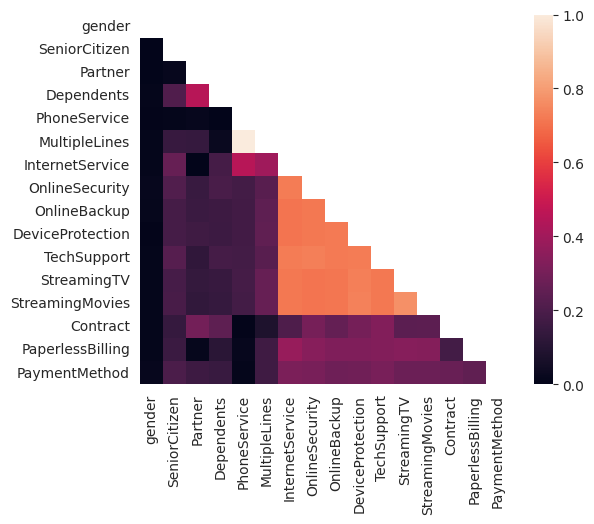

In [ ]:
# Calculate Cramer's V correlation matrix
cramer_v_corr = pd.DataFrame(np.zeros((len(cat_features), len(cat_features))),
                             index=cat_features, columns=cat_features)

for i in range(len(cat_features)):
    for j in range(len(cat_features)):
        if i == j:
            cramer_v_corr.iloc[i, j] = 1.0
        else:
            crosstab = pd.crosstab(df[cat_features[i]], df[cat_features[j]])
            chi2, _, _, _ = chi2_contingency(crosstab)
            n = crosstab.sum().sum()
            cramer_v_corr.iloc[i, j] = np.sqrt(chi2 / (n*(min(crosstab.shape)-1)))

# Heatmap plot
heat_plot(df=cramer_v_corr)

In [ ]:
# Import the modules
from typing import Union, Tuple, List


def calculate_cramers_v(df: pd.DataFrame, cat_features: Union[List, Tuple]):
    """
    Calculate Cramer's V correlation matrix for
    a given DataFrame and categorical features.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the dataset.
    cat_features : list
        List of categorical feature names in the DataFrame.

    Returns:
    --------
    cramer_v_corr : pandas.DataFrame
        DataFrame containing Cramer's V correlation coefficients
        between categorical features.
    """    
    # Create an empty DataFrame for the correlation matrix
    cramer_v_corr = pd.DataFrame(np.zeros((len(cat_features), len(cat_features))),
                                 index=cat_features, columns=cat_features)

    # Iterate through the categorical features to 
    # calculate Cramer's V for each pair of features
    for i in range(len(cat_features)):
        for j in range(len(cat_features)):
            # If the features are the same
            if i == j:
                # Set the correlation coefficient to 1
                cramer_v_corr.iloc[i, j] = 1.0
            else:
                # Calculate the contingency table and perform chi-squared test
                crosstab = pd.crosstab(df[cat_features[i]], df[cat_features[j]])
                chi2, *_ = chi2_contingency(crosstab)
                n = crosstab.sum().sum()
                
                # Calculate the correlation coefficient using Cramer's V formula
                cramer_v_corr.iloc[i, j] = np.sqrt(chi2 / (n*(min(crosstab.shape)-1)))
    # Return the table
    return cramer_v_corr

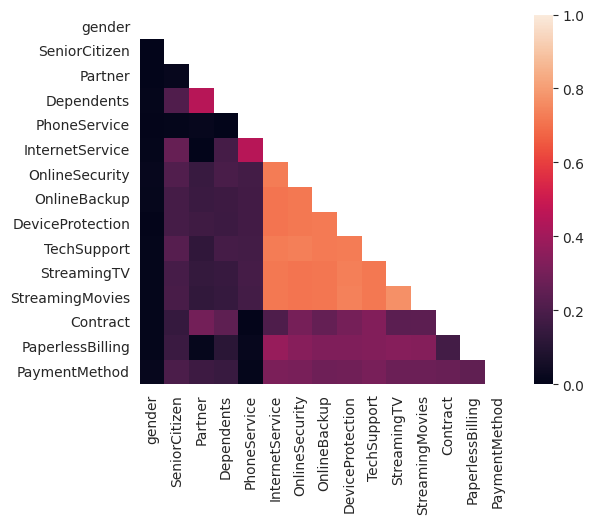

In [ ]:
cat_features_cp = cat_features.copy()
cat_features_cp.pop(cat_features.index("MultipleLines"))

# Cramer's V visualization without `MultipleLines`
heat_plot(df=calculate_cramers_v(df=df,
                                 cat_features=cat_features_cp))

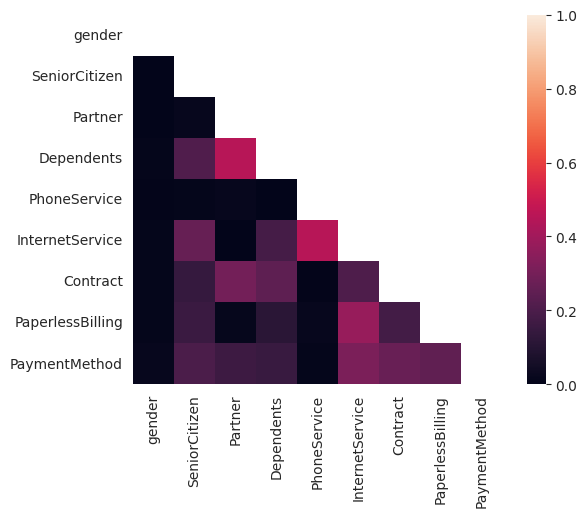

In [ ]:
# Copy the categorical features list in a name `cat_features_cp`
cat_features_cp = cat_features.copy()
# Declare a list named `cols2drop` that represent
# the list of features that are going to be dropped
cols2drop = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]
# Iterate through the columns that are going to be dropped
for col in cols2drop:
    # Delete the feature from the copied categorical feature list
    cat_features_cp.remove(col)

# Heatmap plot
heat_plot(df=calculate_cramers_v(df=df,
                                 cat_features=cat_features_cp))

In [ ]:
# Declare the feature types

# Target
target = "Churn"
# To drop
features_to_drop = [
    "customerID",
    target
]
# PCA features
features_to_pca = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]
# Need to be converted to a dummy variable
features_to_dummy = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "InternetService",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]

In [ ]:
# TotalCharges dtype
df.TotalCharges.dtype

dtype('O')

In [ ]:
# Copy the frame
df_cp = df.copy()
# Recast the `TotalCharges` as float
df_cp["TotalCharges"] = df_cp["TotalCharges"].astype(float)
# Drop if any NaN value occured
df_cp = df_cp.dropna().reset_index(drop=True)
# Check the difference between the length of the original df and the copied df
print(f"The difference in length between frames: {len(df) - len(df_copy)}")

ValueError: ignored

In [ ]:
# Copy the frame
df_cp = df.copy()
# Recast TotalCharges dtype as float
df_cp.loc[:, "TotalCharges"] = pd.to_numeric(arg=df_cp.TotalCharges,
                                             errors="coerce")
# Drop if any NaN value occured, then reset the index
df_cp = df_cp.dropna().reset_index(drop=True)

# Trace
len(df) - len(df_cp)

11

In [ ]:
# Import the modules
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df: pd.DataFrame, target: str) -> pd.DataFrame:
    # Select only numerical features except the target
    X = df.loc[:, df.columns != target].select_dtypes(include=np.number)

    # Declare an empty df for VIF calculation
    vif = pd.DataFrame()
    # Insert the numerical features into the "Feature" column
    vif["Feature"] = X.columns
    # Calculate the VIF for each numerical column
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Return results
    return vif


# Test the function
calculate_vif(df=df_cp, target=target)

,Feature,VIF
0,tenure,6.33
1,MonthlyCharges,3.36
2,TotalCharges,8.08


In [ ]:
# Experimental
df_ex = df_cp.copy()
# VIF calculation by dropping TotalCharges
calculate_vif(df=df_ex.drop(columns=["TotalCharges"]), target=target)

,Feature,VIF
0,tenure,2.62
1,MonthlyCharges,2.62


In [ ]:
# Describe the numerical values
df_cp.loc[:, df_cp.columns != target]\
     .describe(percentiles=[.5])\
     .drop("count")\
     .rename({"50%": "median"})\
     .T

,mean,std,min,median,max
tenure,32.421786,24.545260,1.00,29.000,72.00
MonthlyCharges,64.798208,30.085974,18.25,70.350,118.75
TotalCharges,2283.300441,2266.771362,18.80,1397.475,8684.80


In [ ]:
# Copy the target variable
y = df_cp.loc[:, target]
# Drop not needed columns
df_cp = df_cp.drop(columns=features_to_drop)
# Create dummy variables by deleting the original features
df_cp = pd.get_dummies(data=df_cp,
                       columns=features_to_dummy,
                       drop_first=True)
# Trace
df_cp.sample(n=3, random_state=43)

,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,...,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3933,19,No phone service,No,No,No,No,No,No,25.15,468.35,...,0,0,0,0,0,0,1,0,0,0
3340,2,Yes,No,No,No,No,No,Yes,84.05,186.05,...,0,1,1,0,0,0,1,0,1,0
143,64,Yes,Yes,Yes,No,No,No,No,84.30,5289.05,...,0,1,1,0,1,0,1,1,0,0


In [ ]:
# Import the modules
from sklearn.model_selection import train_test_split

# Split the data into train and test portions
X_train, X_test, y_train, y_test = train_test_split(df_cp.values, y,
                                                    test_size=.3,
                                                    random_state=101)

In [ ]:
cols = df_cp.columns

In [ ]:
from sklearn.decomposition import PCA
from typing import Optional, Tuple


def decomp(df: pd.DataFrame, decomposer: Optional[PCA]=None) -> Tuple[np.ndarray, PCA]:
    X = pd.get_dummies(data=df.loc[:, features_to_pca],
                       drop_first=True)
    if decomposer:
        # Transform the test data
        comps = decomposer.transform(X=X)
    else:
        # Create a decomposer with 1 component
        decomposer = PCA(n_components=1, random_state=43)
        # Fit and transform the training data
        comps = decomposer.fit_transform(X=X)
    # Drop columns
    df = df.drop(columns=features_to_pca)
    # Insert the pca values to the frame
    df.loc[:, "PCA"] = comps
    # Return the values and the decomposer for later usages
    return df.values.astype(dtype="float"), decomposer


# Test the function
X_train_cp, decomposer = decomp(df=pd.DataFrame(data=X_train, columns=cols),
                                decomposer=None)
# Trace
X_train[0], X_train_cp[0]

(array([50, 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 109.65,
        5551.15, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=object),
 array([ 5.00000000e+01,  1.09650000e+02,  5.55115000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -1.13617336e+00]))

In [ ]:
# Test the function for the test data
X_test_cp, _ = decomp(df=pd.DataFrame(data=X_test, columns=cols),
                      decomposer=decomposer)
# Trace
X_test[0], X_test_cp[0]

(array([22, 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 88.75, 1885.15, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=object),
 array([ 2.20000000e+01,  8.87500000e+01,  1.88515000e+03,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -5.48899452e-01]))

In [ ]:
# Import the modules
from sklearn.preprocessing import StandardScaler


def scale(X: np.ndarray, scaler: Optional[StandardScaler]=None) \
        -> Tuple[np.ndarray, StandardScaler]:
    # If scaler given
    if scaler:
        # Transform the test data
        scaled = scaler.transform(X=X)
    else:
        # Create a scaler with 1 component
        scaler = StandardScaler()
        # Fit and transform the training data
        scaled = scaler.fit_transform(X=X)
    # Return the values and the scaler for later usages
    return scaled, scaler


# Test the function
X_train_scaled, scaler = scale(X=X_train_cp,
                               scaler=None)
# Trace
X_train_cp[0], X_train_scaled[0]

(array([ 5.00000000e+01,  1.09650000e+02,  5.55115000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -1.13617336e+00]),
 array([ 0.72370012,  1.4832358 ,  1.44172143, -1.00121976, -0.43296047,
        -0.9676108 , -0.64908474,  0.32796457,  1.11278485, -0.52515766,
        -0.50843059,  1.78575927,  0.82836822, -0.51570001,  1.38415201,
        -0.53584876, -0.99196388]))

In [ ]:
# Test the function for the test data
X_test_scaled, _ = scale(X=X_test_cp,
                         scaler=scaler)
# Trace
X_test_cp[0], X_test_scaled[0]

(array([ 2.20000000e+01,  8.87500000e+01,  1.88515000e+03,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -5.48899452e-01]),
 array([-0.42053731,  0.79049268, -0.17214534,  0.99878173, -0.43296047,
         1.03347338,  1.54063088,  0.32796457,  1.11278485, -0.52515766,
        -0.50843059, -0.55998589,  0.82836822, -0.51570001,  1.38415201,
        -0.53584876, -0.47923006]))

In [ ]:
# Install modules
!pip install -q lazypredict
# Import the modules
from lazypredict.Supervised import LazyClassifier

In [ ]:
# Declare the lazy classifier object
clf = LazyClassifier(verbose=0, random_state=43)
# Start training
models, predictions = clf.fit(X_train=X_train_scaled,
                              X_test=X_test_scaled,
                              y_train=y_train,
                              y_test=y_test)

100%|██████████| 29/29 [00:26<00:00,  1.09it/s]


In [ ]:
models.sort_values(by="Accuracy",
                   ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.81,0.72,0.72,0.80,0.21
CalibratedClassifierCV,0.80,0.71,0.71,0.80,1.53
AdaBoostClassifier,0.80,0.71,0.71,0.80,0.38
LinearSVC,0.80,0.71,0.71,0.80,1.21
RidgeClassifier,0.80,0.70,0.70,0.79,0.06
RidgeClassifierCV,0.80,0.70,0.70,0.79,0.15
SVC,0.80,0.70,0.70,0.79,2.53
NuSVC,0.80,0.67,0.67,0.78,3.00
LGBMClassifier,0.80,0.71,0.71,0.79,4.39


In [ ]:
# Declare the pipeline of the best model
pipe = clf.provide_models(X_train=X_train_scaled,
                          X_test=X_test_scaled,
                          y_train=y_train,
                          y_test=y_test)["LogisticRegression"]
# Trace
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Int64Index([], dtype='int64')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Int64Index([], dtype='int64'))])),
                ('classifier', LogisticRegression(random_state=43))])

In [ ]:
# Import the modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

# Create a LogisticRegression object
logreg = LogisticRegression()

# Define the hyperparameter search space
param_dist = {"C": loguniform(1e-5, 100),
              "penalty": ["l1", "l2", "elasticnet", "none"],
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "max_iter": [100, 500, 1000, 2000]}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=logreg,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring="accuracy",
                                   cv=5,
                                   random_state=43)

# Fit the RandomizedSearchCV to the data
random_search.fit(X=X_train_scaled, y=y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

# Retrieve the best model
best_logreg = random_search.best_estimator_
# Predict on the test data
y_pred = best_logreg.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print accuracy
print("Accuracy:", round(accuracy, 2))

Best Hyperparameters:  {'C': 3.8854847591230968, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.81


In [ ]:
# Fastbook + relevant packages installation
! [ -e /content ] && pip install -Uqq fastbook

# Import the modules
import fastbook
# Setup the book
fastbook.setup_book()

# Import the modules
from fastai.tabular.all import *
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Assuming that numpy and df_cp (a DataFrame) are imported and available for use

# Concatenate the scaled training data (X_train_scaled) with the target variable (y_train)
# along the column axis (axis=1) to create a new array con_train
con_train = np.concatenate((X_train_scaled, y_train[:, None]), axis=1)

# Concatenate the scaled testing data (X_test_scaled) with the target variable (y_test)
# along the column axis (axis=1) to create a new array con_test
con_test = np.concatenate((X_test_scaled, y_test[:, None]), axis=1)

# Concatenate the con_train and con_test arrays along the row axis (axis=0) to create
# a combined array con that contains both training and testing data
con = np.concatenate((con_train, con_test), axis=0)

# Get the shape of the combined array con, which gives the number of rows and columns
# in the array as a tuple (rows, columns), and store it in a variable
# Also, get the length of the DataFrame df_cp (which is assumed to be available)
# and return it as a single value
con.shape, len(df_cp)

((7032, 18), 7032)

In [ ]:
# Create a df for the training data
df_fast_train = pd.DataFrame(data=con_train, columns=np.arange(con.shape[1]))
# Declare a Dataloader over TabularPandas object
to = TabularPandas(df=df_fast_train,
                   cont_names=[i for i in range(con.shape[1]-1)],
                   y_names=17, y_block = CategoryBlock(),
                   splits=RandomSplitter(valid_pct=0.1, seed=101)(o=df_fast_train))
# To DataLoaders object
dls = to.dataloaders()
# Trace
dls.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1066,0.32,1.14,0.79,-1.00,2.31,1.03,-0.65,0.33,1.11,-0.53,1.97,-0.56,0.83,1.94,-0.72,-0.54,-0.72,1.00
779,0.36,1.25,0.85,1.00,-0.43,1.03,1.54,0.33,1.11,-0.53,1.97,-0.56,0.83,-0.52,1.38,-0.54,-0.86,1.00
1757,-0.62,-1.48,-0.85,-1.00,-0.43,-0.97,-0.65,0.33,-0.90,1.90,1.97,-0.56,-1.21,-0.52,-0.72,1.87,1.84,0.00
314,0.15,-1.50,-0.73,-1.00,-0.43,-0.97,-0.65,0.33,-0.90,1.90,1.97,-0.56,-1.21,-0.52,-0.72,1.87,1.84,0.00
1954,-1.24,0.36,-0.92,1.00,-0.43,-0.97,-0.65,0.33,1.11,-0.53,-0.51,-0.56,0.83,-0.52,1.38,-0.54,-0.10,1.00
497,1.46,0.89,1.83,-1.00,-0.43,1.03,-0.65,0.33,-0.90,-0.53,-0.51,1.79,0.83,-0.52,1.38,-0.54,-1.18,0.00
4489,-1.12,-1.51,-0.96,1.00,-0.43,-0.97,-0.65,0.33,-0.90,1.90,-0.51,-0.56,0.83,-0.52,-0.72,1.87,1.84,0.00
4079,-1.28,-1.15,-0.99,1.00,-0.43,1.03,1.54,-3.05,-0.90,-0.53,-0.51,-0.56,-1.21,-0.52,1.38,-0.54,-0.17,1.00
3164,0.44,-1.27,-0.51,1.00,-0.43,-0.97,-0.65,0.33,-0.90,1.90,-0.51,1.79,-1.21,-0.52,-0.72,-0.54,1.72,0.00
1178,-1.20,-1.49,-0.98,1.00,-0.43,-0.97,-0.65,0.33,-0.90,1.90,-0.51,-0.56,0.83,-0.52,-0.72,1.87,1.84,1.00


SuggestedLRs(slide=0.015848932787775993, valley=0.0014454397605732083)

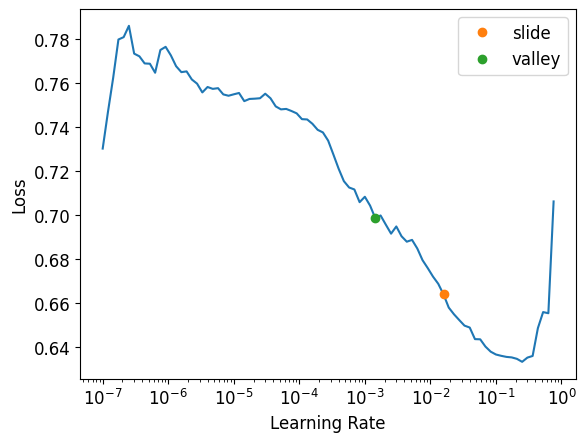

In [ ]:
# Declare a tabular learner
learn = tabular_learner(dls=dls,
                        metrics=[accuracy])
# Find the optimum learning rate
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
# Fit the model
learn.fit(n_epoch=50, lr=0.005,
          cbs=[SaveModelCallback,
               ReduceLROnPlateau,
               EarlyStoppingCallback(patience=10)])

epoch,train_loss,valid_loss,accuracy,time
0,0.476665,0.410675,0.806911,00:00
1,0.443275,0.408977,0.792683,00:00
2,0.435588,0.417661,0.778455,00:00
3,0.413836,0.401004,0.800813,00:00
4,0.404974,0.402734,0.815041,00:01
5,0.402704,0.402155,0.813008,00:01
6,0.402181,0.402619,0.806911,00:02
7,0.399997,0.404107,0.806911,00:02
8,0.399897,0.402827,0.806911,00:01
9,0.399127,0.402581,0.808943,00:01


Better model found at epoch 0 with valid_loss value: 0.4106753468513489.
Better model found at epoch 1 with valid_loss value: 0.4089772701263428.
Epoch 2: reducing lr to 0.0005
Better model found at epoch 3 with valid_loss value: 0.4010041654109955.
Epoch 4: reducing lr to 5e-05
Epoch 5: reducing lr to 5e-06
Epoch 6: reducing lr to 5.000000000000001e-07
Epoch 7: reducing lr to 5.000000000000001e-08
Epoch 8: reducing lr to 5.000000000000001e-09
Epoch 9: reducing lr to 5.000000000000001e-10
Epoch 10: reducing lr to 5.0000000000000015e-11
Epoch 11: reducing lr to 5.000000000000001e-12
Epoch 12: reducing lr to 5.000000000000001e-13
Epoch 13: reducing lr to 5.000000000000001e-14
No improvement since epoch 3: early stopping


In [ ]:
# Create a df for the test data
df_fast_test = pd.DataFrame(data=con_test, columns=np.arange(con.shape[1]))
# Necessary transformations for the modeling
tst_dl = learn.dls.test_dl(test_items=df_fast_test)
# Predict the results
preds, targs = learn.get_preds(dl=tst_dl)
# Accuracy
acc = accuracy(inp=preds,
               targ=targs.squeeze()).item()

In [ ]:
# Trace
print(f"Accuracy: {round(acc * 100, 2)}%.")

Accuracy: 80.43%.
